# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 9
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_9D_modisa_3.csv
out_filename: df_chl_out_9D_modisa_4.csv


,id,time,temp,var_lat,var_tmp,ve,var_lon,vn,lon,spd,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3627,10206,2002-11-07,NaN,0.000494,1000.000000,-2.217083,0.001535,2.990778,67.132000,5.446583,11.126222,0.130267,-0.885166,-0.004264,NaN,540.82800
3629,11089,2002-11-07,28.829472,0.000064,0.003812,-16.412472,0.000123,-3.991722,64.391056,17.995028,14.279667,0.197237,-0.705012,0.074821,-1.125976,872.56400
3631,15707,2002-11-07,NaN,0.000074,1000.000000,-12.316611,0.000147,-18.253056,67.155306,24.656417,13.142667,0.152200,-0.817584,-0.004472,NaN,574.11000
3649,34710,2002-11-07,28.448167,0.000069,0.001857,-2.827667,0.000135,19.539861,63.041861,20.774778,17.717111,0.372568,-0.428795,0.018603,-1.730417,531.86600
3886,10206,2002-11-16,NaN,0.001033,1000.000000,-1.089083,0.003872,0.501111,67.029167,4.028889,11.179833,0.145233,-0.837935,0.014966,-1.824894,553.88000
3908,34710,2002-11-16,27.578250,0.000072,0.001784,-22.552528,0.000145,43.271833,62.309722,50.700222,20.075111,0.519753,-0.284203,0.147185,-0.832136,342.85300
3914,34721,2002-11-16,29.067417,0.000055,0.001740,-0.677889,0.000102,12.004250,68.328250,12.875833,13.725389,0.140869,-0.851185,-0.011473,NaN,479.64400
4145,10206,2002-11-25,NaN,0.000959,1000.000000,-6.485944,0.003371,2.996944,66.854361,7.461361,11.321750,0.139399,-0.855741,-0.005834,NaN,571.47300
4163,34315,2002-11-25,28.913944,0.000055,0.004285,-24.691694,0.000103,-20.388611,57.571889,37.391222,6.818222,0.144874,-0.839008,0.008411,-2.075127,714.86500


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

2.5532554586218947e-15

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,temp,var_lat,var_tmp,ve,var_lon,vn,lon,spd,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3627,10206,2002-11-07,NaN,0.000494,1000.000000,-2.217083,0.001535,2.990778,67.132000,5.446583,11.126222,0.130267,-0.885166,-0.004264,NaN,540.828,-0.003637
3629,11089,2002-11-07,28.829472,0.000064,0.003812,-16.412472,0.000123,-3.991722,64.391056,17.995028,14.279667,0.197237,-0.705012,0.074821,-1.125976,872.564,0.042150
3631,15707,2002-11-07,NaN,0.000074,1000.000000,-12.316611,0.000147,-18.253056,67.155306,24.656417,13.142667,0.152200,-0.817584,-0.004472,NaN,574.110,-0.003264
3649,34710,2002-11-07,28.448167,0.000069,0.001857,-2.827667,0.000135,19.539861,63.041861,20.774778,17.717111,0.372568,-0.428795,0.018603,-1.730417,531.866,0.005548
3886,10206,2002-11-16,NaN,0.001033,1000.000000,-1.089083,0.003872,0.501111,67.029167,4.028889,11.179833,0.145233,-0.837935,0.014966,-1.824894,553.880,0.011450


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    672.000000
mean      -0.047204
std        0.298702
min       -5.161217
25%       -0.027176
50%       -0.002103
75%        0.018240
max        0.106001
Name: chlor_a_logE_rate, dtype: float64

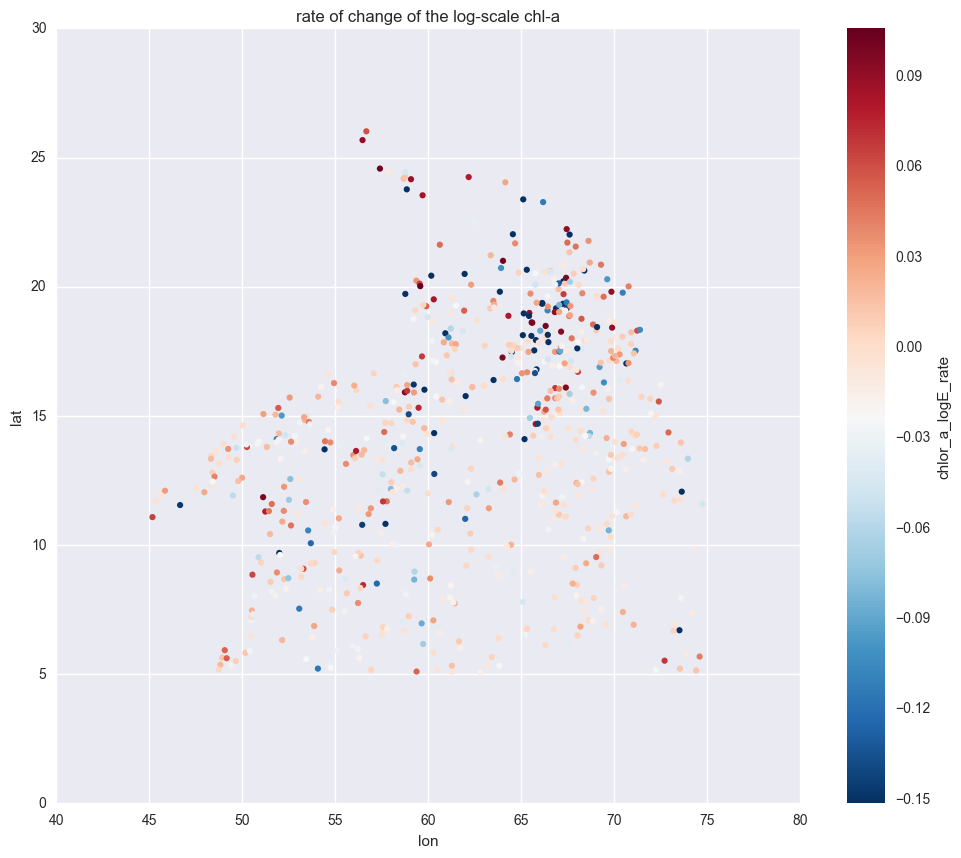

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

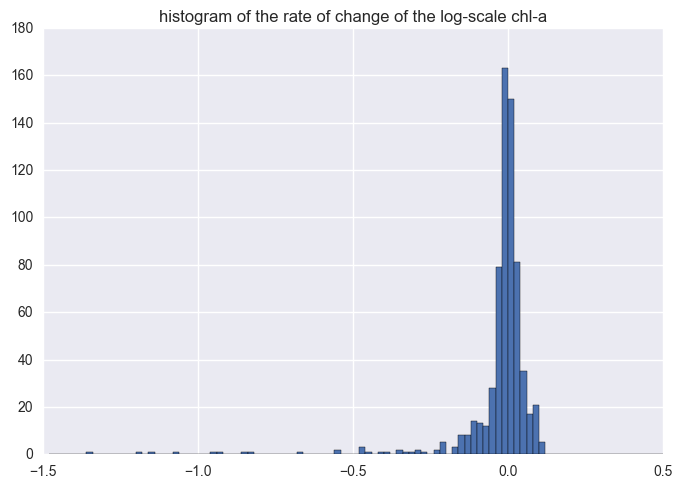

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

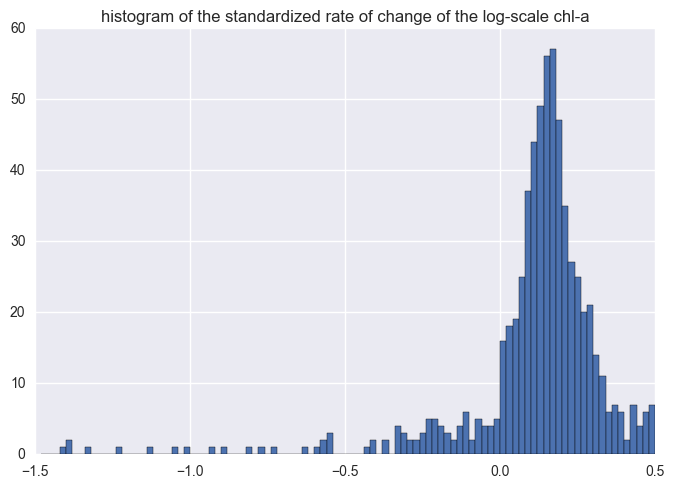

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [20]:
(np.log(0.139399)-np.log(0.145233))   / freq

-0.004555447177321037

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-25"
# (0.139399 - 0.145233) / (freq*0.139399)    == -0.004650121035460963
#########
# Val 2:
# id:10206, time:2002-11-25"
# (np.log(0.139399)-np.log(0.145233))   / freq == -0.004555447177321037 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,temp,var_lat,var_tmp,ve,var_lon,vn,lon,spd,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3627,10206,2002-11-07,NaN,0.000494,1000.0,-2.217083,0.001535,2.990778,67.132000,5.446583,11.126222,0.130267,-0.885166,-0.004264,NaN,540.828,-0.003637
3886,10206,2002-11-16,NaN,0.001033,1000.0,-1.089083,0.003872,0.501111,67.029167,4.028889,11.179833,0.145233,-0.837935,0.014966,-1.824894,553.880,0.011450
4145,10206,2002-11-25,NaN,0.000959,1000.0,-6.485944,0.003371,2.996944,66.854361,7.461361,11.321750,0.139399,-0.855741,-0.005834,NaN,571.473,-0.004650
4922,10206,2002-12-22,NaN,0.000940,1000.0,-9.425833,0.003372,2.559389,64.642194,10.393528,12.534861,0.155556,-0.808113,0.028268,-1.548705,823.529,0.020191
5181,10206,2002-12-31,NaN,0.000537,1000.0,-11.699944,0.001649,-4.870667,63.871028,13.154361,12.416694,0.256233,-0.591366,0.100677,-0.997072,907.451,0.043657


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,temp,var_lat,var_tmp,ve,var_lon,vn,lon,spd,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3627,10206,2002-11-07,NaN,0.000494,1000.0,-2.217083,0.001535,2.990778,67.132000,5.446583,11.126222,0.130267,-0.885166,-0.004264,NaN,540.828,-0.003637
3886,10206,2002-11-16,NaN,0.001033,1000.0,-1.089083,0.003872,0.501111,67.029167,4.028889,11.179833,0.145233,-0.837935,0.014966,-1.824894,553.880,0.011450
4145,10206,2002-11-25,NaN,0.000959,1000.0,-6.485944,0.003371,2.996944,66.854361,7.461361,11.321750,0.139399,-0.855741,-0.005834,NaN,571.473,-0.004650
4922,10206,2002-12-22,NaN,0.000940,1000.0,-9.425833,0.003372,2.559389,64.642194,10.393528,12.534861,0.155556,-0.808113,0.028268,-1.548705,823.529,0.020191
5181,10206,2002-12-31,NaN,0.000537,1000.0,-11.699944,0.001649,-4.870667,63.871028,13.154361,12.416694,0.256233,-0.591366,0.100677,-0.997072,907.451,0.043657


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_9D_modisa_4.csv


,id,time,temp,var_lat,var_tmp,ve,var_lon,vn,lon,spd,lat,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3627,10206,2002-11-07,NaN,0.000494,1000.0,-2.217083,0.001535,2.990778,67.132000,5.446583,11.126222,0.130267,-0.885166,-0.004264,NaN,540.828,-0.003637
3886,10206,2002-11-16,NaN,0.001033,1000.0,-1.089083,0.003872,0.501111,67.029167,4.028889,11.179833,0.145233,-0.837935,0.014966,-1.824894,553.880,0.011450
4145,10206,2002-11-25,NaN,0.000959,1000.0,-6.485944,0.003371,2.996944,66.854361,7.461361,11.321750,0.139399,-0.855741,-0.005834,NaN,571.473,-0.004650
4922,10206,2002-12-22,NaN,0.000940,1000.0,-9.425833,0.003372,2.559389,64.642194,10.393528,12.534861,0.155556,-0.808113,0.028268,-1.548705,823.529,0.020191
5181,10206,2002-12-31,NaN,0.000537,1000.0,-11.699944,0.001649,-4.870667,63.871028,13.154361,12.416694,0.256233,-0.591366,0.100677,-0.997072,907.451,0.043657


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


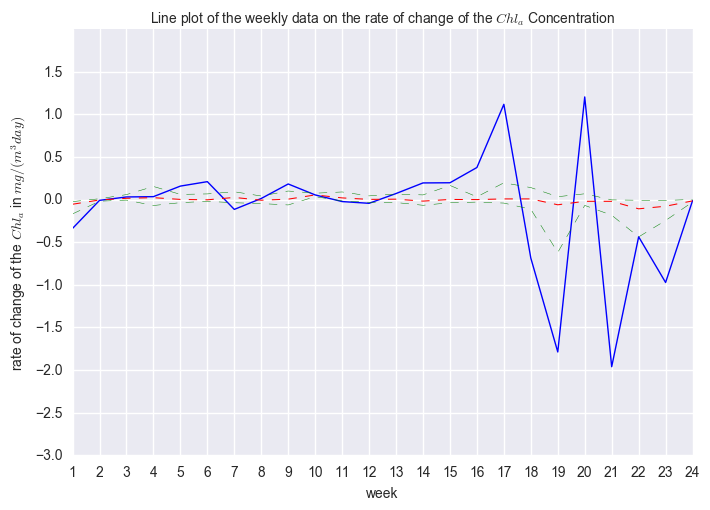

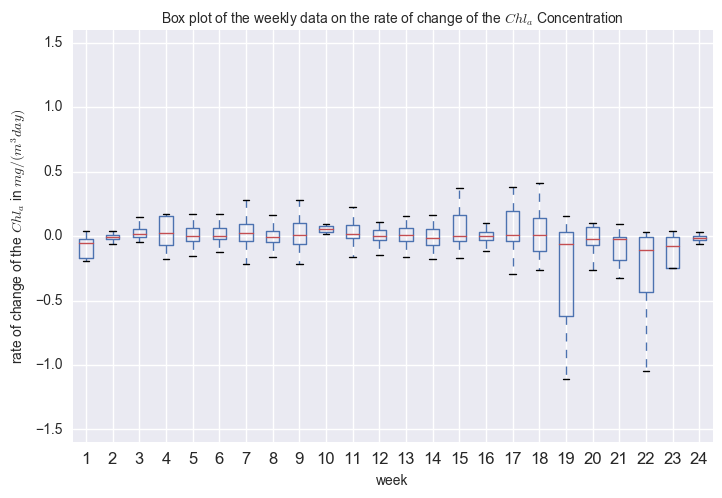

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

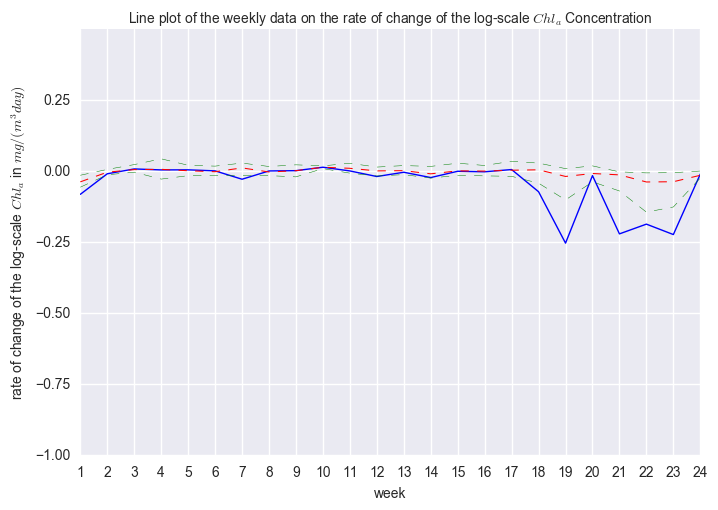

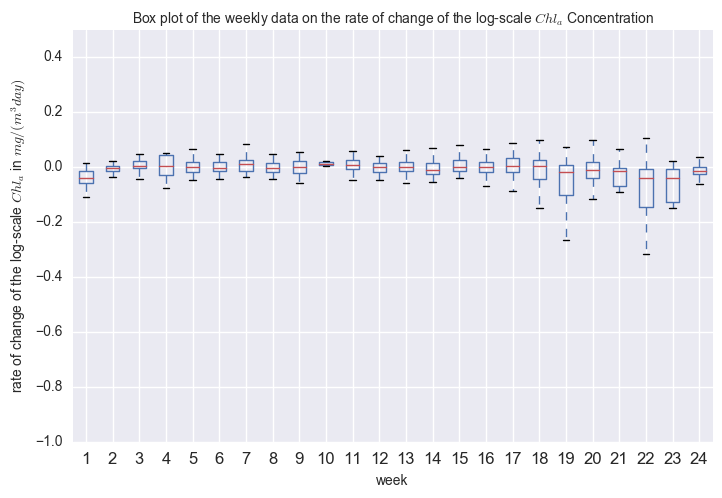

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    96.000000
mean      0.012455
std       0.429691
min      -2.486943
25%      -0.034751
50%      -0.001842
75%       0.037115
max       3.221807
Name: chl_rate, dtype: float64


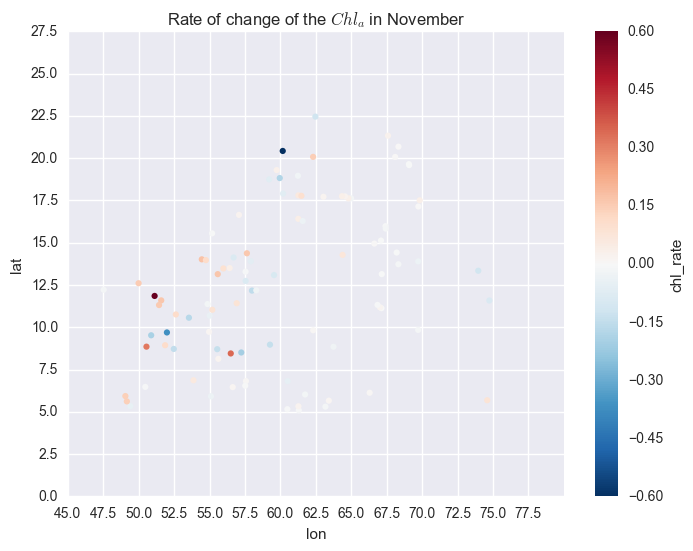



 summary of the Chl_rate 
 count    107.000000
mean       0.043719
std        0.669715
min       -3.907649
25%       -0.039013
50%        0.006873
75%        0.091452
max        4.021897
Name: chl_rate, dtype: float64


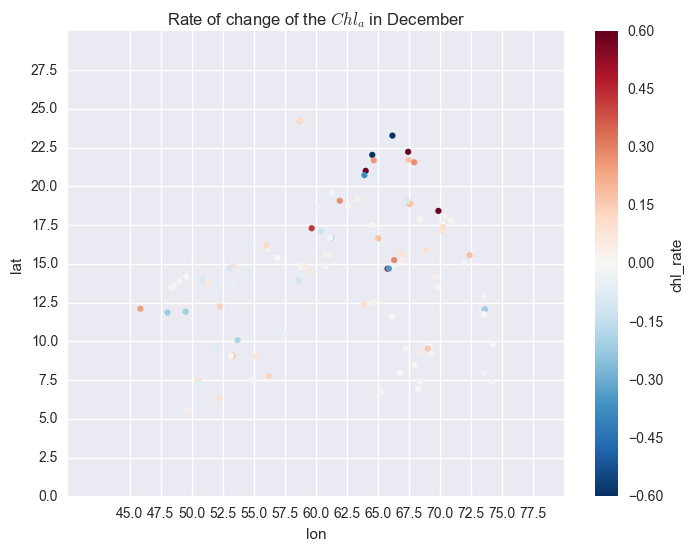



 summary of the Chl_rate 
 count    138.000000
mean       0.112610
std        0.940781
min       -2.493273
25%       -0.035617
50%        0.003296
75%        0.071782
max        8.387535
Name: chl_rate, dtype: float64


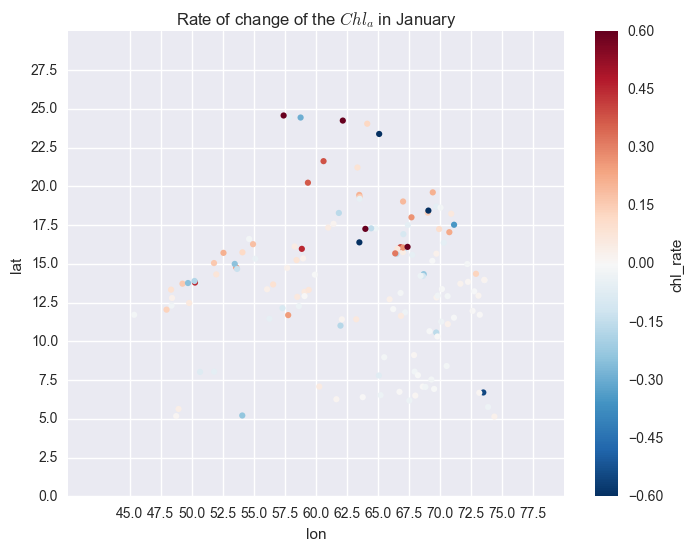



 summary of the Chl_rate 
 count    163.000000
mean      -0.170131
std        4.628012
min      -36.659316
25%       -0.062838
50%        0.002575
75%        0.118639
max       29.752610
Name: chl_rate, dtype: float64


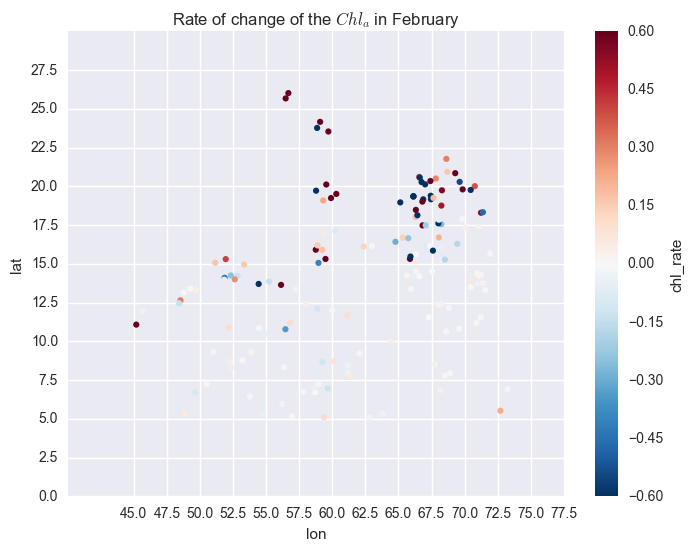



 summary of the Chl_rate 
 count    168.000000
mean      -0.260570
std        3.774943
min      -27.225871
25%       -0.139986
50%       -0.023220
75%        0.002949
max       26.473112
Name: chl_rate, dtype: float64


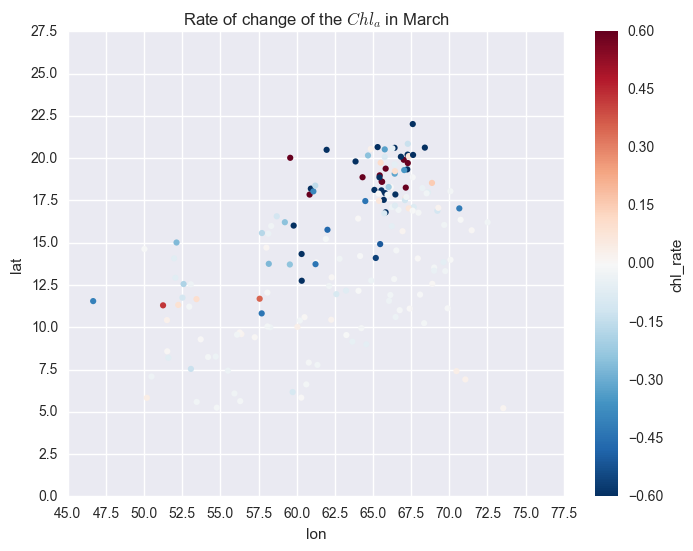

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
